# **CURSO 19150-Data-science_Alumno:Arias_Claudio
3ra Entrega

### CONSIGNA: 
* Con este archivo,***"Summer-Olympic-medals-1976-to-2008.csv"*** 
1. Construir un objeto de series de tiempo con el índice igual al año de los juegos olímpicos
2. Separar nombres de apellidos en dos columnas distintas usando la coma como separador
3. Obtener medidas resumen del conjunto de datos. Cuál es el país que ganó más medallas?
4. Construir una tabla que muestre cuántas medallas obtuvieron los hombres en total en cada año que se realizó el evento.
#### Aspectos a incluir en el entregable:
El código debe estar hecho en un notebook y debe estar probado.


# 1. Construir un objeto de series de tiempo con el índice igual al año de los juegos olímpicos.
###    1-1 al importar el csv me indica que hay un error:
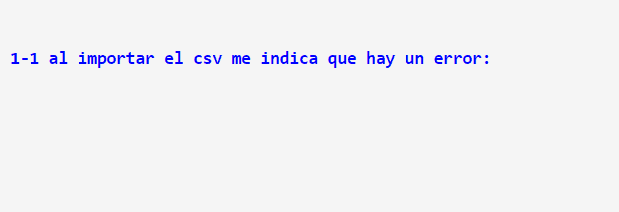



para corregir esto use **encoding='ISO-8859-1'**
### 1.1 Importo las librerías "Pandas" y "Numpy"

In [33]:
import pandas as pd
import numpy as np
from PIL import Image # es para el tratamiento de imágenes que estoy adjuntando

In [12]:
# importo csv y uso encoding ISO-8859-1 
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding=('ISO-8859-1'))
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [11]:
df.set_index('Year', inplace=True) # Indice igual a año de juegos olímpicos
df

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
Year,,,,,,,,,,
1976.0,Montreal,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1976.0,Montreal,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
1976.0,Montreal,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
1976.0,Montreal,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
1976.0,Montreal,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...
2008.0,Beijing,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
2008.0,Beijing,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
2008.0,Beijing,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver


# 2. Separar nombres de apellidos en dos columnas distintas usando la coma como separador


Voy a utilizar para separar por comas, **"str.split"**, pero antes de separar por comas, verifico sino hay valores nulos, para invocarlos voy a utilizar la función **"isnull"** para que me indique que elementos son **"NaN"** o **"None"** y para el ejercicio voy a eliminar todo, podría elegir, la opción de rellenar con un nro, pero no sería útil en este caso. 

In [14]:
df.isnull().sum() #con esto voy a verificar todas las columnas cuantos elementos vacios hay
#se puede observar que hay 117 elementos que debo eliminar

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [15]:
df[df.Year.isnull()] # en las 11 columnas están los 117 elementos

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### vamos a eliminar estos valores **NaN** con el método **dropna**

In [16]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum() #vuelvo a comprobar que la suma me dé cero para confirmar y confirmo que es ok
# y lo siguiente es pasar ahora si al punto 2 del ejercicio

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [26]:
df['Year'] = df['Year'].astype(int)

In [27]:
df.set_index('Year', inplace=True)

In [28]:
df # verifico que el indice Year este corregido

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
Year,,,,,,,,,,
1976,Montreal,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1976,Montreal,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
1976,Montreal,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
1976,Montreal,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
1976,Montreal,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...
2008,Beijing,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
2008,Beijing,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
2008,Beijing,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver


In [29]:
df["Athlete"].str.split(",") # separo en columnas separadas y relleno los datos vacíos con CERO

Year
1976             [KÖHLER,  Christa]
1976         [KOSENKOV,  Aleksandr]
1976        [BOGGS,  Philip George]
1976    [CAGNOTTO,  Giorgio Franco]
1976      [WILSON,  Deborah Keplar]
                   ...             
2008          [GUENOT,  Christophe]
2008         [KVIRKELIA,  Manuchar]
2008            [RAHIMOV,  Vitaliy]
2008              [GUENOT,  Steeve]
2008               [LOPEZ,  Mijain]
Name: Athlete, Length: 15316, dtype: object

# 3. Obtener medidas resumen del conjunto de datos. Cuál es el país que ganó más medallas?
Rpta United States con 1992

#### Este punto me costó mucho razonarlo, pero aprendi, 3 formas
#####      1. Las mas sencilla es **Describe** 
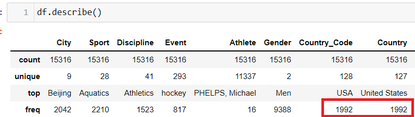
               
#### 2.df.groupby('Country')['Medal'].count().sort_values(ascending=False) agrupo las columnas **Country** y **Medal** y que totaliza en orden ascendente, si cambio (acending=False), por nlargest(3), me traería, solamente las 3 primeras.
 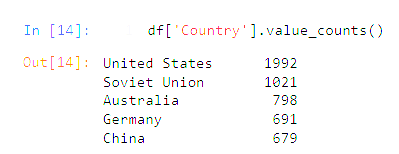

In [36]:
df['Country'].value_counts() #que hace lo mismo que ascending y me resulta más fácil
#esto es lo que solicita el ejercicio

United States      1992
Soviet Union       1021
Australia           798
Germany             691
China               679
                   ... 
Cote d'Ivoire         1
Djibouti              1
Senegal               1
Virgin Islands*       1
Afghanistan           1
Name: Country, Length: 127, dtype: int64

# 4. Construir una tabla que muestre cuántas medallas obtuvieron los hombres en total en cada año que se realizó el evento.


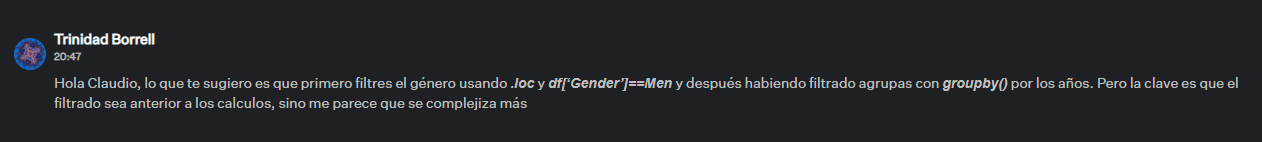

In [41]:
df[df['Event_gender']=='M'].groupby('Year').count() # entonces de esta manera filtré por Event_gender y al haber corregido
#más arriba el int de Year, pude totalizar por lo que solicitaba el ejercicio

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
Year,,,,,,,,,,
1976,843,843,843,843,843,843,843,843,843,843
1980,854,854,854,854,854,854,854,854,854,854
1984,911,911,911,911,911,911,911,911,911,911
1988,950,950,950,950,950,950,950,950,950,950
1992,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
1996,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029
2000,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
2004,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052
2008,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072


## Observaciones
#### Aún no logro desarrollarlo solo, me cuesta bastante, pero si entendi lo de antes que nada explorar los datos y luego si empezar
#### bueno, tarde pero algunos conceptos me quedaron fijados
#### Muchas gracias
